In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
import pickle
import torch
import torch.nn as nn

from datetime import datetime
from statistics import mean 

warnings.simplefilter("ignore", UserWarning)

In [3]:
result = pd.read_csv("./dataset/example_result.csv")
train_df = pd.read_csv("./dataset/intern_homework_train_dataset.csv")
public_test = pd.read_csv("./dataset/intern_homework_public_test_dataset.csv")
private_test = pd.read_csv("./dataset/intern_homework_private_test_dataset.csv")

# Dataset Analysis

0. Numerial Analysis
1. Relationship between Created Time and Like Count
2. Like Count Analysis
3. Comment Count Analysis
4. Relationship between Like Count and Comment Count
5. Hot Topic Analysis

## 0. Numerial Analysis

In [3]:
train_df.describe()

,like_count_1h,like_count_2h,like_count_3h,like_count_4h,like_count_5h,like_count_6h,comment_count_1h,comment_count_2h,comment_count_3h,comment_count_4h,comment_count_5h,comment_count_6h,forum_id,author_id,forum_stats,like_count_24h
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,3.097500,5.224340,7.67098,10.249960,12.733960,15.048340,4.463440,6.798680,9.004460,11.088480,12.993100,14.726880,477643.067400,498339.91460,116.125080,45.194840
std,19.274621,24.516945,29.24685,35.367611,43.009398,51.984946,51.510914,60.982037,69.300161,77.946028,87.371928,99.403843,286979.254083,289767.40654,206.109233,180.888108
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,321.000000,2.00000,0.000000,5.000000
25%,0.000000,1.000000,2.00000,2.000000,3.000000,3.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,174372.000000,243660.75000,16.300000,7.000000
50%,1.000000,3.000000,4.00000,5.000000,5.000000,6.000000,1.000000,3.000000,4.000000,5.000000,5.000000,6.000000,497426.000000,501998.00000,38.000000,13.000000
75%,3.000000,5.000000,7.00000,9.000000,11.000000,12.000000,4.000000,6.000000,9.000000,11.000000,13.000000,14.000000,717594.000000,751721.50000,93.700000,30.000000
max,4044.000000,4797.000000,5098.00000,5362.000000,5822.000000,6588.000000,4902.000000,4923.000000,4928.000000,4928.000000,5969.000000,8031.000000,998778.000000,999998.00000,1128.300000,13297.000000


In [18]:
public_test.describe()

,like_count_1h,like_count_2h,like_count_3h,like_count_4h,like_count_5h,like_count_6h,comment_count_1h,comment_count_2h,comment_count_3h,comment_count_4h,comment_count_5h,comment_count_6h,forum_id,author_id,forum_stats,like_count_24h,weekday,period
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.158700,4.970700,6.952300,9.084600,11.20470,13.224100,3.585700,5.629200,7.370500,9.056100,10.692400,12.199300,466839.991500,501339.618600,95.559920,44.141800,2.833600,2.181800
std,9.133425,14.256941,20.266684,26.511419,32.45265,38.482172,30.897047,55.840637,66.067185,75.036398,82.797764,90.160994,284712.927981,291717.802182,168.664431,167.441347,1.933827,1.358946
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3013.000000,20.000000,0.000000,5.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,2.000000,2.00000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,174372.000000,245222.000000,13.100000,7.000000,1.000000,1.000000
50%,1.000000,2.000000,3.000000,4.000000,5.00000,5.000000,1.000000,2.000000,3.000000,4.000000,4.000000,5.000000,492107.000000,506340.000000,33.100000,13.000000,3.000000,2.000000
75%,3.000000,5.000000,6.000000,8.000000,9.00000,11.000000,4.000000,5.000000,7.000000,9.000000,11.000000,12.000000,699763.000000,756543.750000,88.200000,30.000000,4.000000,3.000000
max,429.000000,617.000000,904.000000,1187.000000,1377.00000,1497.000000,2086.000000,4064.000000,4845.000000,5610.000000,5896.000000,6453.000000,998778.000000,999855.000000,1016.800000,6316.000000,6.000000,5.000000


In [19]:
private_test.describe()

,like_count_1h,like_count_2h,like_count_3h,like_count_4h,like_count_5h,like_count_6h,comment_count_1h,comment_count_2h,comment_count_3h,comment_count_4h,comment_count_5h,comment_count_6h,forum_id,author_id,forum_stats
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000
mean,3.03010,4.677600,6.520800,8.620300,10.723000,12.74950,3.786000,5.660800,7.372800,9.08520,10.710400,12.28000,477461.174000,498972.255700,103.98249
std,7.65653,13.023318,19.414707,27.724307,36.533428,45.23322,39.732663,55.459824,68.996232,80.41957,90.078554,100.67642,287097.043933,290366.065288,170.65836
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,3013.000000,156.000000,0.00000
25%,0.00000,1.000000,1.000000,2.000000,2.000000,3.00000,0.000000,0.000000,1.000000,1.00000,1.000000,1.00000,174372.000000,240551.750000,12.40000
50%,1.00000,2.000000,3.000000,4.000000,4.000000,5.00000,1.000000,2.000000,2.000000,3.00000,4.000000,4.00000,497426.000000,502041.000000,33.40000
75%,3.00000,5.000000,6.000000,7.000000,9.000000,10.00000,3.000000,5.000000,6.000000,8.00000,9.000000,11.00000,717594.000000,754534.750000,111.60000
max,258.00000,476.000000,897.000000,1509.000000,2179.000000,2815.00000,2382.000000,3108.000000,3642.000000,4362.00000,4790.000000,5420.00000,998222.000000,999982.000000,865.30000


## 1. Relationship between Created Time and Like Count

In [12]:
def process_time(created_at, one_hot=True):
    time = datetime.strptime(created_at, '%Y-%m-%d %H:%M:%S UTC')
    weekday = time.weekday()
    weekday_vec = [1 if i == weekday else 0 for i in range(7)]
    period = 0
    
    if time.hour >= 0 and time.hour < 4:
        period = 0
    elif time.hour >= 4 and time.hour < 8:
        period = 1
    elif time.hour >= 8 and time.hour < 12:
        period = 2
    elif time.hour >= 12 and time.hour < 16:
        period = 3
    elif time.hour >= 16 and time.hour < 20:
        period = 4
    else:
        period = 5
    period_vec = [1 if i == period else 0 for i in range(6)]
    if one_hot:
        return weekday_vec, period_vec
    return weekday, period

weekdays = []
periods = []
for index, row in train_df.iterrows():
    weekday, period = process_time(row["created_at"], one_hot=False)
    weekdays.append(weekday)
    periods.append(period)
train_df["weekday"] = weekdays
train_df["period"] = periods

weekdays = []
periods = []
for index, row in public_test.iterrows():
    weekday, period = process_time(row["created_at"], one_hot=False)
    weekdays.append(weekday)
    periods.append(period)
public_test["weekday"] = weekdays
public_test["period"] = periods

In [147]:
print("Period Analysis on Training Data\n----")

period_dict = train_df.period.value_counts().to_dict()
period_word = ["midnight", "early morning", "morning", "afternoon", "evening", "night"]
period_name = "Period"
period_id = "ID"
period_sum = "Total"
period_mean = "Mean Like Count"
print(f"{period_name:<15} ({period_id:<2}): {period_sum:<8}, {period_mean}\n---")
for key in period_dict:
    num = train_df.loc[train_df["period"] == key].like_count_24h.mean()
    print(f"{period_word[key]:<15} ({key:<2}): {period_dict[key]:<8}, {num}")
    
print("\nPeriod Analysis on Public Test Data\n----")
period_dict = public_test.period.value_counts().to_dict()
for key in period_dict:
    num = public_test.loc[train_df["period"] == key].like_count_24h.mean()
    print(f"{period_word[key]:<15} ({key:<2}): {period_dict[key]:<8}, {num}")

Period Analysis on Training Data
----
Period          (ID): Total   , Mean Like Count
---
afternoon       (3 ): 12666   , 41.4254697615664
morning         (2 ): 11064   , 45.54745119305857
early morning   (1 ): 10829   , 46.72702927324776
evening         (4 ): 7233    , 47.248029863127336
midnight        (0 ): 6476    , 43.610407659048796
night           (5 ): 1732    , 58.27771362586605

Period Analysis on Public Test Data
----
afternoon       (3 ): 2497    , 48.55519611807521
morning         (2 ): 2196    , 45.01124100719424
early morning   (1 ): 2188    , 39.951329427670125
evening         (4 ): 1528    , 42.966160220994475
midnight        (0 ): 1264    , 42.485407066052225
night           (5 ): 327     , 45.0688622754491


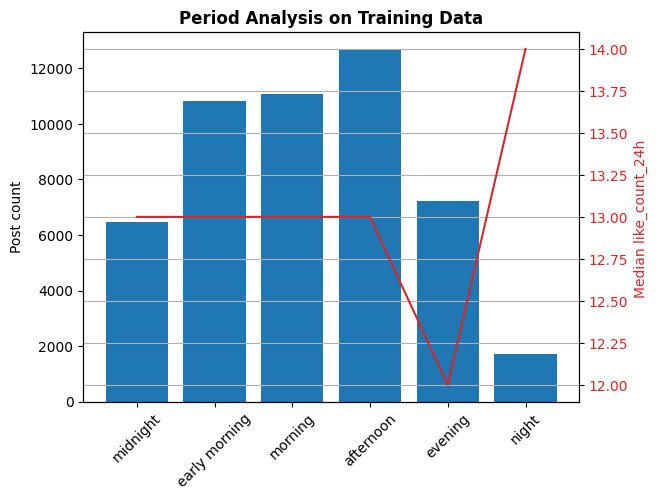

In [148]:
period_dict = train_df.period.value_counts().to_dict()
period_total = [period_dict[i] for i in range(6)]
period_like_mean = [train_df.loc[train_df["period"] == i].like_count_24h.median() for i in range(6)]

fig, ax1 = plt.subplots()
 
ax1.set_ylabel('Post count')
ax1.bar(period_word, period_total)
ax1.tick_params(axis ='y')
ax1.set_xticklabels(period_word, rotation=45)
 
# Adding Twin Axes
ax2 = ax1.twinx()
 
color = 'tab:red'
ax2.set_ylabel('Median like_count_24h ', color = color)
ax2.plot(period_like_mean, color=color)
ax2.tick_params(axis ='y', labelcolor = color)
 
# Adding title
plt.title('Period Analysis on Training Data', fontweight ="bold")
plt.grid()
plt.show()


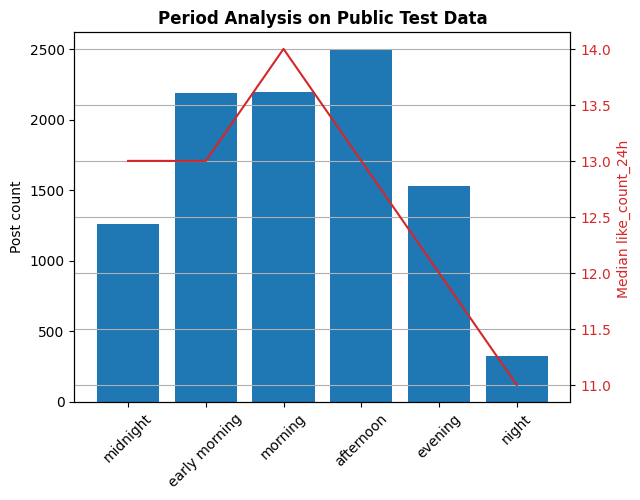

In [149]:
period_dict = public_test.period.value_counts().to_dict()
period_total = [period_dict[i] for i in range(6)]
period_like_mean = [public_test.loc[public_test["period"] == i].like_count_24h.median() for i in range(6)]

fig, ax1 = plt.subplots()
 
ax1.set_ylabel('Post count')
ax1.bar(period_word, period_total)
ax1.tick_params(axis ='y')
ax1.set_xticklabels(period_word, rotation=45)
 
# Adding Twin Axes
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Median like_count_24h ', color = color)
ax2.plot(period_like_mean, color=color)
ax2.tick_params(axis ='y', labelcolor = color)
 
# Adding title
plt.title('Period Analysis on Public Test Data', fontweight ="bold")
plt.grid()
plt.show()


In [17]:
print("Weekday Analysis on Training Data\n----")
weekday_name = "Weekday"
weekday_id = "ID"
weekday_sum = "Total"
weekday_mean = "Mean Like Count"
print(f"{weekday_name:<15} ({weekday_id:<2}): {weekday_sum:<8}, {weekday_mean}\n---")
weekday_word = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = train_df.weekday.value_counts().to_dict()

for key in weekday_dict:
    num = train_df.loc[train_df["weekday"] == key].like_count_24h.mean()
    print(f"{weekday_word[key]:<15} ({key:2}): {weekday_dict[key]:<8}, {num}")
    
print("\nWeekday Analysis on Public Test Data\n----")
weekday_dict = public_test.weekday.value_counts().to_dict()

for key in weekday_dict:
    num = public_test.loc[train_df["weekday"] == key].like_count_24h.mean()
    print(f"{weekday_word[key]:<15} ({key:2}): {weekday_dict[key]:<8}, {num}")

Weekday Analysis on Training Data
----
Weekday         (ID): Total   , Mean Like Count
---
Thursday        ( 3): 8090    , 47.06588380716934
Friday          ( 4): 7699    , 44.579036238472526
Tuesday         ( 1): 7300    , 41.509726027397264
Wednesday       ( 2): 7159    , 41.74633328677189
Monday          ( 0): 6986    , 44.23733180647008
Saturday        ( 5): 6589    , 49.94232812262862
Sunday          ( 6): 6177    , 47.88246721709568

Weekday Analysis on Public Test Data
----
Tuesday         ( 1): 1668    , 38.54210526315789
Thursday        ( 3): 1614    , 53.76500315855969
Wednesday       ( 2): 1608    , 45.277346506704305
Monday          ( 0): 1365    , 41.56555090655509
Friday          ( 4): 1350    , 43.03159252095422
Sunday          ( 6): 1235    , 38.900082576383156
Saturday        ( 5): 1160    , 46.81542056074766


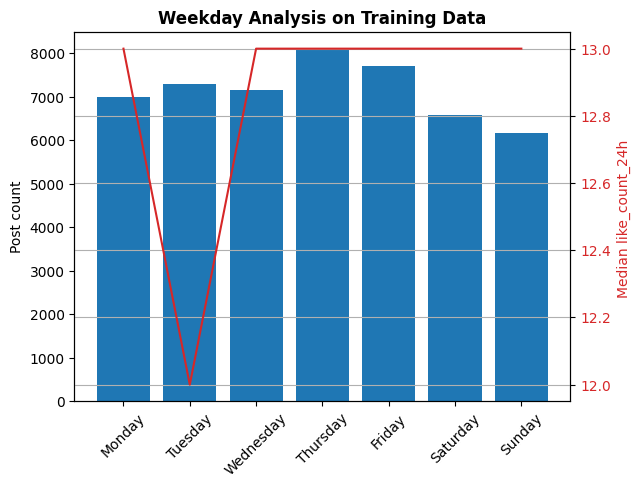

In [150]:
weekday_dict = train_df.weekday.value_counts().to_dict()
weekday_total = [weekday_dict[i] for i in range(7)]
weekday_like_mean = [train_df.loc[train_df["weekday"] == i].like_count_24h.median() for i in range(7)]

fig, ax1 = plt.subplots()
 
ax1.set_ylabel('Post count')
ax1.bar(weekday_word, weekday_total)
ax1.tick_params(axis ='y')
ax1.set_xticklabels(weekday_word, rotation=45)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Median like_count_24h ', color = color)
ax2.plot(weekday_like_mean, color=color)
ax2.tick_params(axis ='y', labelcolor = color)
 
# Adding title
plt.title('Weekday Analysis on Training Data', fontweight ="bold")
plt.grid()
# Show plot
plt.show()


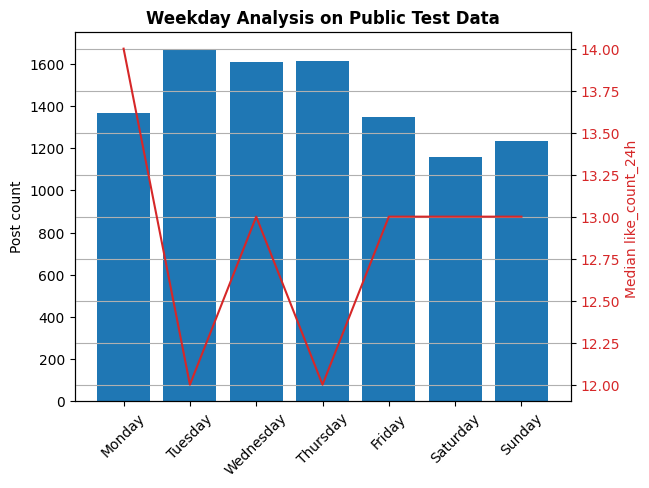

In [151]:
weekday_dict = public_test.weekday.value_counts().to_dict()
weekday_total = [weekday_dict[i] for i in range(7)]
weekday_like_mean = [public_test.loc[public_test["weekday"] == i].like_count_24h.median() for i in range(7)]

fig, ax1 = plt.subplots()
 
ax1.set_ylabel('Post count')
ax1.bar(weekday_word, weekday_total)
ax1.tick_params(axis ='y')
ax1.set_xticklabels(weekday_word, rotation=45)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Median like_count_24h ', color = color)
ax2.plot(weekday_like_mean, color=color)
ax2.tick_params(axis ='y', labelcolor = color)
 
# Adding title
plt.title('Weekday Analysis on Public Test Data', fontweight ="bold")
plt.grid()
# Show plot
plt.show()


## 2. Like Count Analysis

In [43]:
def get_statics(keyword, df):
    cols = []
    for col in df.columns:
        if keyword in col:
            cols.append(col)
    max_num = []
    mean_num = []
    median_num= []
    for col in cols:
        max_num.append(df[col].max())
        mean_num.append(df[col].mean())
        median_num.append(df[col].median())
    print(max_num)
    print(mean_num)
    print(median_num)
    return max_num, mean_num, median_num

def draw_analysis(title, keyword, df):
    max_num_count, mean_num_count, median_num_count = get_statics(keyword, df)
    fig, ax = plt.subplots(2)
    ax[0].plot(max_num_count, color='orange', label='max')
    ax[0].grid()
    ax[0].legend()


    ax[0].set_xticklabels(["0", "1h", "2h", "3h", "4h", "5h", "6h", "24h"])
    ax[0].set_title(title)

    ax[1].plot(mean_num_count, color='blue', label='mean')
    ax[1].plot(median_num_count, color='green', label='median')
    ax[1].set_xticklabels(["0", "1h", "2h", "3h", "4h", "5h", "6h", "24h"])
    ax[1].grid()
    ax[1].legend()

    plt.show()

[4044, 4797, 5098, 5362, 5822, 6588, 13297]
[3.0975, 5.22434, 7.67098, 10.24996, 12.73396, 15.04834, 45.19484]
[1.0, 3.0, 4.0, 5.0, 5.0, 6.0, 13.0]


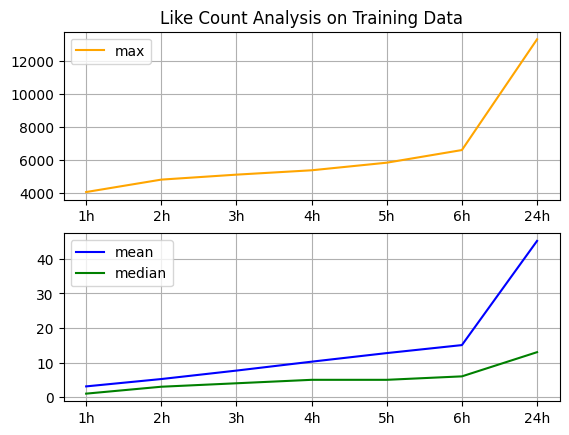

In [44]:
draw_analysis("Like Count Analysis on Training Data", "like", train_df)

[429, 617, 904, 1187, 1377, 1497, 6316]
[3.1587, 4.9707, 6.9523, 9.0846, 11.2047, 13.2241, 44.1418]
[1.0, 2.0, 3.0, 4.0, 5.0, 5.0, 13.0]


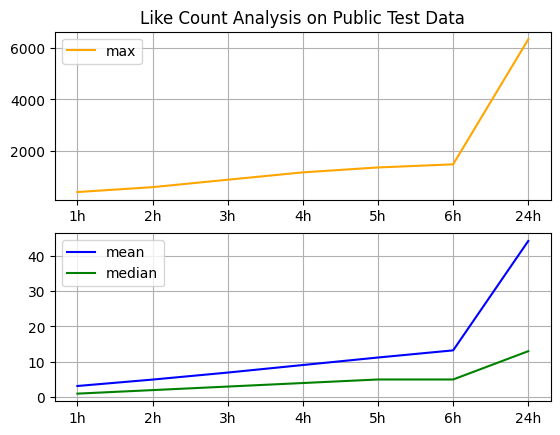

In [45]:
draw_analysis("Like Count Analysis on Public Test Data", "like", public_test)

[258, 476, 897, 1509, 2179, 2815]
[3.0301, 4.6776, 6.5208, 8.6203, 10.723, 12.7495]
[1.0, 2.0, 3.0, 4.0, 4.0, 5.0]


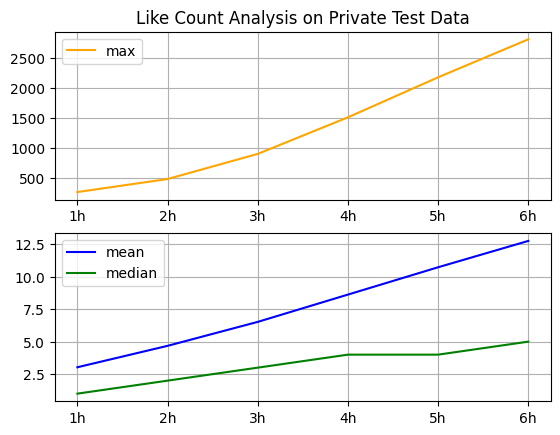

In [46]:
draw_analysis("Like Count Analysis on Private Test Data", "like", private_test)

## 3. Comment Count Analysis

[4902, 4923, 4928, 4928, 5969, 8031]
[4.46344, 6.79868, 9.00446, 11.08848, 12.9931, 14.72688]
[1.0, 3.0, 4.0, 5.0, 5.0, 6.0]


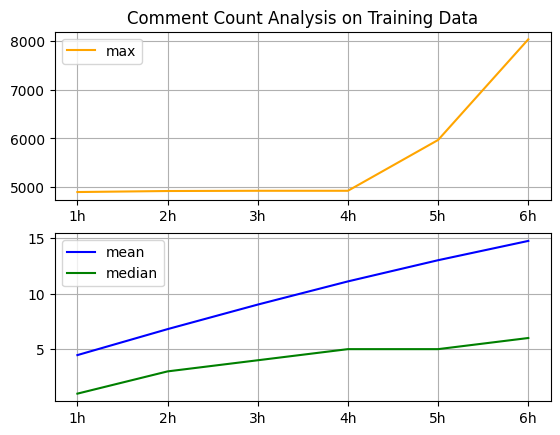

In [47]:
draw_analysis("Comment Count Analysis on Training Data", "comment", train_df)

[2086, 4064, 4845, 5610, 5896, 6453]
[3.5857, 5.6292, 7.3705, 9.0561, 10.6924, 12.1993]
[1.0, 2.0, 3.0, 4.0, 4.0, 5.0]


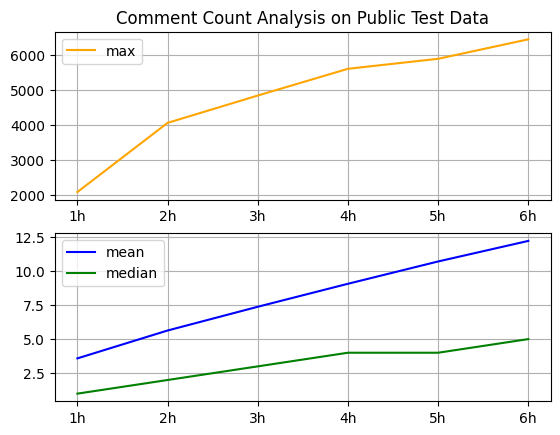

In [48]:
draw_analysis("Comment Count Analysis on Public Test Data", "comment", public_test)

[2382, 3108, 3642, 4362, 4790, 5420]
[3.786, 5.6608, 7.3728, 9.0852, 10.7104, 12.28]
[1.0, 2.0, 2.0, 3.0, 4.0, 4.0]


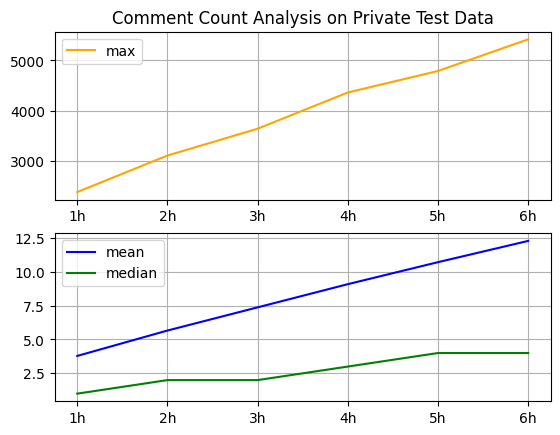

In [49]:
draw_analysis("Comment Count Analysis on Private Test Data", "comment", private_test)

## 4. Relationship between Like Count and Comment Count

In [59]:
def draw_dual_analysis(title, df):
    max_num_count, mean_num_count, median_num_count = get_statics("like", df)
    max_num_comment, mean_num_comment, median_num_comment = get_statics("comment", df)
    # fig, ax = plt.subplots(2)
#     ax[0].plot(max_num_count, color='orange', label='like max')
#     ax[0].grid()
#     ax[0].legend()


#     ax[0].set_xticklabels(["0", "1h", "2h", "3h", "4h", "5h", "6h", "24h"])
    plt.title(title)

    plt.plot(mean_num_count, color='blue', label='like mean')
    plt.plot(median_num_count, label='like median')
    plt.plot(mean_num_comment, color='red', label='comment mean')
    plt.plot(median_num_comment, color='pink', label='comment median')
    position = [0, 1, 2, 3, 4, 5, 6]
    plt.xticks(position, ["1h", "2h", "3h", "4h", "5h", "6h", "24h"])
    plt.grid()
    plt.legend()

    plt.show()

[4044, 4797, 5098, 5362, 5822, 6588, 13297]
[3.0975, 5.22434, 7.67098, 10.24996, 12.73396, 15.04834, 45.19484]
[1.0, 3.0, 4.0, 5.0, 5.0, 6.0, 13.0]
[4902, 4923, 4928, 4928, 5969, 8031]
[4.46344, 6.79868, 9.00446, 11.08848, 12.9931, 14.72688]
[1.0, 3.0, 4.0, 5.0, 5.0, 6.0]


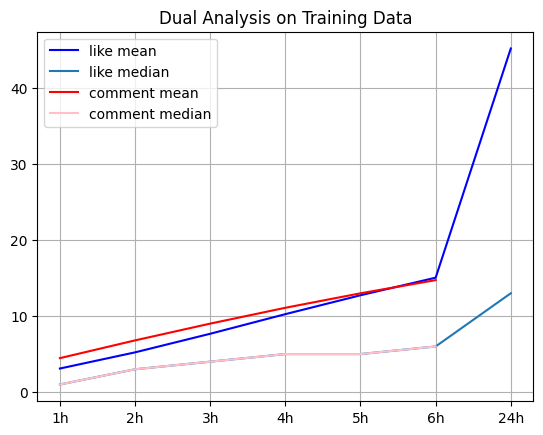

In [60]:
draw_dual_analysis("Dual Analysis on Training Data", train_df)

## 5. Hot Topic Analysis

- like_count_6h is an important information to predict like_count_24h, but the relationship is not lienar
- Title is an important factor, most title with #分享 has lots of like count

In [80]:
for idx, row in train_df.iterrows():
    if row["like_count_24h"] >= 2000:
        print(f"{row.title}, {row.like_count_6h}, {row.comment_count_6h}, {row.like_count_24h}")

#新聞 IU坦承「耳朵出問題」已1年：我無法控制, 346, 21, 3590
20歲我得了肺癌四期, 1592, 287, 8935
#分享 李泳知:「請教我如何消除曖昧感情」, 1402, 54, 3028
因有人誤按下車鈴 公車司機暴怒死不開車, 562, 187, 3274
#分享 金高銀為了見Rosé在機場狂奔, 274, 14, 3135
我的app不想起床🥲, 677, 30, 2540
婚禮不推薦，大雷區（一輩子的遺憾）, 385, 72, 2194
我上VOGUE了！！！, 557, 45, 3251
超級圓頂刪文之黃牛操作, 1019, 292, 2154
我對奶奶講了很重的話, 134, 20, 4903
20歲的我 大腸癌末期，但經檢查發現是腦部功能部分殘缺, 147, 59, 3646
美工刀男......是英雄吧, 33, 24, 2601
一個人想著一個人, 113, 29, 3600
爆哥奪冠後直播說的幾句話, 489, 60, 3663
果斷分手, 475, 88, 3321
一個人的旅行，我一點也不開心, 987, 195, 3264
努力成為普妹, 18, 12, 2750
#分享 什麼疑問都能解決的萬事通柳炳宰, 1154, 45, 2675
五年多的感情 分手卻不用一個小時, 21, 15, 3012
男友車禍, 78, 37, 3636
英國女王逝世享耆壽96歲！, 6588, 1288, 13297
#集中討論 韓國進入哀悼期 娛樂節目/活動皆取消 ⚠️無影片, 931, 208, 2766
警察用fb私訊我說我被通緝, 439, 187, 2432
我包養了一個衛生習慣很差的女人⋯, 408, 1, 2410
*更新 多年閨蜜私下問我男友可不可以幫她刮痧🙃, 422, 155, 3040
我家有信義的房子卻窮到只能吃豬血糕, 182, 37, 2002
家人自殺了該如何調適？, 205, 26, 2168
約砲被嗆讀學店, 416, 815, 2435
對不起 我不乾淨, 134, 47, 3124
人生吃過最巨的全家霜淇淋, 659, 71, 2368
21歲捐肝, 506, 94, 5171
捷運上的可愛情侶, 705, 112, 3341
男友忘記掛電話，讓我聽到噁心事實(已分手封鎖), 57, 51, 7588

# Training Result Comparison

In [100]:
result = pickle.load(open("model_4-1.pkl", "rb"))

# find best loss
min_loss = np.inf
id = 0
for i in range(len(result)):
    if result[i]["best_mse"] < min_loss:
        min_loss = result[i]["best_mse"]
        id = i
print(id, min_loss)
print(result[1].keys())

1 0.27862592936514285
dict_keys(['best_mse', 'best_weights', 'train_losses', 'eval_losses', 'test'])


In [4]:
def draw(train_losses, eval_losses, test_loss, n_epochs, title):
    epoch_average_loss = []
    sample_per_epoch = len(train_losses) // n_epochs
    for i in range(0, len(train_losses), sample_per_epoch):
        epoch_average_loss.append(mean(train_losses[i:i+sample_per_epoch]))
    # print(epoch_average_loss)
    test_losses = [test_loss for i in range(n_epochs)]
    plt.plot(epoch_average_loss, label='train')
    plt.plot(eval_losses, color='orange', label='eval')
    plt.plot(test_losses, color='red', linestyle='dashed', label='test')
    plt.xlabel("Epoch")
    plt.ylabel("MAPE Loss")
    plt.legend()
    plt.title(title)
    plt.grid()
    plt.show()

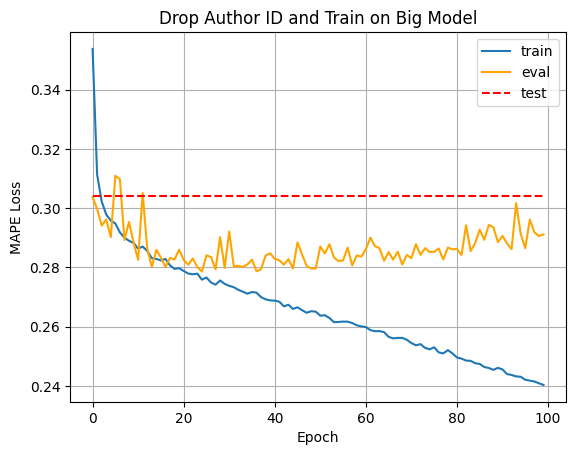

In [107]:
draw(train_losses=result[id]["train_losses"], 
     eval_losses=result[id]["eval_losses"],
     test_loss=result[id]["test"],
     n_epochs=len(result[id]["eval_losses"]),
     title="Drop Author ID and Train on Big Model")

1 0.2840277286954581


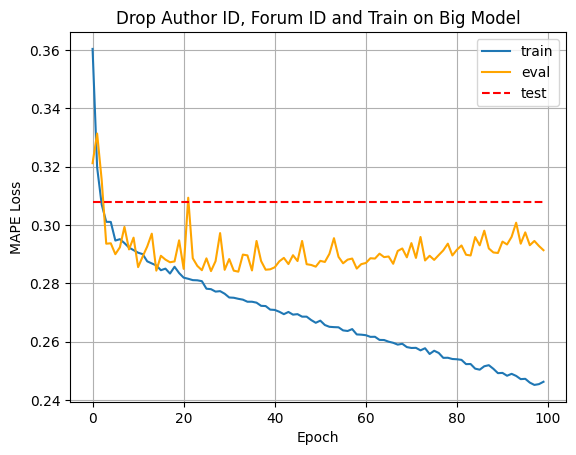

In [109]:
result = pickle.load(open("model_4-2.pkl", "rb"))

# find best loss
min_loss = np.inf
id = 0
for i in range(len(result)):
    if result[i]["best_mse"] < min_loss:
        min_loss = result[i]["best_mse"]
        id = i
print(id, min_loss)

draw(train_losses=result[id]["train_losses"], 
     eval_losses=result[id]["eval_losses"],
     test_loss=result[id]["test"],
     n_epochs=len(result[id]["eval_losses"]),
     title="Drop Author ID, Forum ID and Train on Big Model")

0 0.39212888888657665


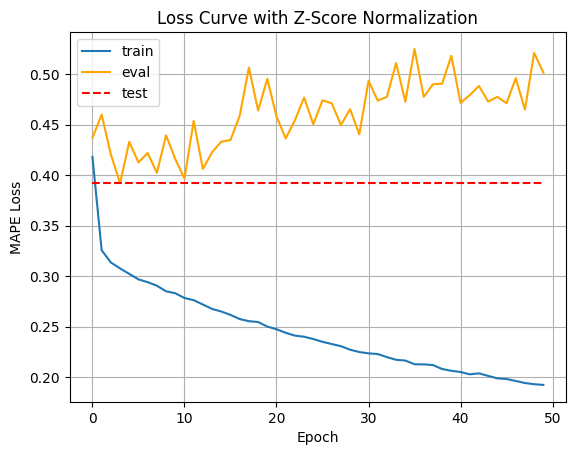

In [7]:
result = pickle.load(open("model_4-10.pkl", "rb"))

# find best loss
min_loss = np.inf
id = 0
for i in range(len(result)):
    if result[i]["best_mse"] < min_loss:
        min_loss = result[i]["best_mse"]
        id = i
print(id, min_loss)

draw(train_losses=result[id]["train_losses"], 
     eval_losses=result[id]["eval_losses"],
     test_loss=min_loss,
     n_epochs=len(result[id]["eval_losses"]),
     title="Loss Curve with Z-Score Normalization")

3 0.44480467747194696


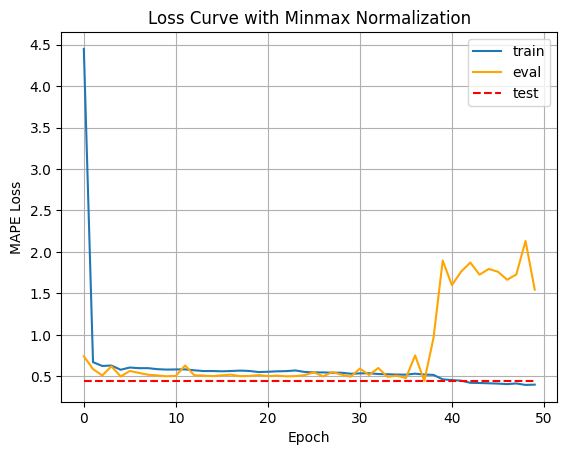

In [8]:
result = pickle.load(open("model_4-11.pkl", "rb"))

# find best loss
min_loss = np.inf
id = 0
for i in range(len(result)):
    if result[i]["best_mse"] < min_loss:
        min_loss = result[i]["best_mse"]
        id = i
print(id, min_loss)

draw(train_losses=result[id]["train_losses"], 
     eval_losses=result[id]["eval_losses"],
     test_loss=min_loss,
     n_epochs=len(result[id]["eval_losses"]),
     title="Loss Curve with Minmax Normalization")

# Chinese Embedding Analysis

In [133]:
import fasttext.util
import jieba

def get_chinese_words(sentence):
    """Return list of Chinese words in sentence. """
    return jieba.lcut(sentence)

ft = fasttext.load_model("cc.zh.300.bin")

In [135]:
sample = train_df.sample(n=100).title.tolist()

In [136]:
sample[:5]

['好焦慮', '海大交流用餐的美好場所', '校內餐車可以說擺就擺?  好大的官威', '為早日退休來規劃儲蓄', '德文']

In [139]:
ft.get_nearest_neighbors("男友", 5)

[(0.8760565519332886, '女友'),
 (0.7847150564193726, '男朋友'),
 (0.6546722650527954, '女朋友'),
 (0.654244601726532, '前男友'),
 (0.6324369311332703, '老公')]

In [141]:
for title in sample:
    print(title)
    for word in get_chinese_words(title):
        print("  ", end="")
        print(word, ft.get_nearest_neighbors(word, 3))
    print("-----")

好焦慮
  好 [(0.7388618588447571, '好的'), (0.6664491891860962, '有好'), (0.6585137248039246, '好啊')]
  焦慮 [(0.7241049408912659, '焦慮與'), (0.7160909175872803, '與焦慮'), (0.7126180529594421, '焦慮感')]
-----
海大交流用餐的美好場所
  海大 [(0.5432385206222534, '海'), (0.4983229637145996, '南大'), (0.48222044110298157, '海洋')]
  交流 [(0.5693467259407043, '沟通'), (0.5542014241218567, '交流会'), (0.5524648427963257, '切磋')]
  用餐 [(0.7804979085922241, '就餐'), (0.6288178563117981, '取餐'), (0.6244280338287354, '聚餐')]
  的 [(0.7478072047233582, '和'), (0.7200769186019897, '，'), (0.7033641338348389, '以及')]
  美好 [(0.6629433631896973, '美妙'), (0.5991758704185486, '不美好'), (0.5867148041725159, '幸福')]
  場所 [(0.6672771573066711, '场所'), (0.6258043050765991, '場域'), (0.5981377363204956, '場地')]
-----
校內餐車可以說擺就擺?  好大的官威
  校內 [(0.6674145460128784, '校園內'), (0.6350433230400085, '校園'), (0.6101403832435608, '學校內')]
  餐車 [(0.5985031127929688, '攤車'), (0.551476240158081, 'LILI&CoCo'), (0.5292946100234985, '餐檯')]
  可以 [(0.8128459453582764, '也可以'), (0.787225